In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,dlf the arbour,sector 63,7.90,20000.0,3950.0,Built Up area: 3950 (366.97 sq.m.)Carpet area: 2900 sq.ft. (269.42 sq.m.),4,4,3+,not available,34.0,NaN,Jan 2028,"['Radhakrishna Shani Mandir', 'pracksht hospital', 'Vatsalya Clinic', 'SPAZE BUSINESS PARK', 'International Tech Park', 'Intellion Park', 'Hdfc bank', 'Hdfc bank and atm', 'Pizza Hut', 'Madison and Pike']",[],NaN
1,flat,birla navya,sector 63a,3.70,15416.0,2400.0,Carpet area: 2400 (222.97 sq.m.),3,3,3+,not available,1.0,North,By 2024,"['Sector 54 Chowk Metro Station', 'WorldMark Gurgaon', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'Gurgaon - Delhi Expy', 'Heritage Xperiential Learning, CRPF Rd', 'Sushant University', 'W Pratiksha Hospital', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station', 'Capital Cyberscape', 'DoubleTree by Hilton Hotel']",[],"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
2,flat,deepak minda,manesar,1.20,4528.0,2650.0,Carpet area: 2650 (246.19 sq.m.),3,3,3+,servant room,6.0,North-West,5 to 10 Year Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash Hospital', 'Shri Rade Clinic', 'Yadav Dental & Eye Care', 'Dental Hospital', 'Petrol pump Maitri motors', 'Petrol Pump', ""McDonald's"", ""McDonald's"", 'Rao Dhaba']","['7 Fan', '7 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Piped-gas', 'Rain Water Harvesting']"
3,house,unitech uniworld resorts,sector 33,11.50,24573.0,4680.0,Plot area 520(434.79 sq.m.),5,6,3+,servant room,4.0,East,1 to 5 Year Old,"['Rajiv Chowk Mosque', 'Icici bank ATM', 'Standard chartered ATM', 'Samvit Health Care', 'Airforce Hospital', 'Medanta', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Sukhmani Hospital Pvt. Ltd', 'Vaishnavi Nursing Home', 'Best Urologist Atcomplete Family Clinic', 'Ayushman Hospital And Trauma Centre', 'Park Hospital Gurgaon', 'Wellness Eye Centre', 'Neelkanth Health Care', 'Dr. Aruna Kalra', 'Vishesh Dental', 'Smile Plus Dental Clinic', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Bansal Medicare and Maternity Centre', 'Pushpanjali Hospital Gurgaon', 'Shri Ram Dental Clinic', 'Sunrise Hospital Gurgaon', 'Meher Clinic', 'Rajendra Hospital', 'Pushpanjali Hospital', 'Sai Dental Clinic', 'Nutan Dental Hospital', 'Parmar Dental Clinic & Lab', 'Road and Traffic Authority', 'Gurgaon Election Commission', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'KFC', 'Haldiram', ""Domino's Pizza"", ""Nirula's"", 'Kendriya Vidyalaya No.2 Sohna Road', 'Delhi Public School Primary Section']","['5 Wardrobe', '6 Fan', '18 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal']"
4,flat,ireo the corridors,sector 67a,1.85,9531.0,1941.0,Built Up area: 1941 (180.32 sq.m.),3,4,3,"study room,store room",4.0,East,0 to 1 Year Old,"['Huda Metro Station (Gurugram)', 'Paras Trinity Mall', 'Southern Peripheral Road', 'Lovely Public School', 'KIIT College of Engineering', 'Indira Gandhi International Airport

In [5]:
df.duplicated().sum()

135

## 1.areawithType

In [6]:
df['areaWithType'].isnull().sum()

0

In [7]:
df['areaWithType'].value_counts()

Plot area 360(301.01 sq.m.)                                                                                                     38
Plot area 300(250.84 sq.m.)                                                                                                     26
Plot area 200(167.23 sq.m.)                                                                                                     20
Plot area 502(419.74 sq.m.)                                                                                                     19
Plot area 270(225.75 sq.m.)                                                                                                     17
Super Built up area 1350(125.42 sq.m.)                                                                                          17
Super Built up area 1578(146.6 sq.m.)                                                                                           17
Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.)      

In [8]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
249,2.00,2149.0,Super Built up area 2149(199.65 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.)
2728,0.35,637.0,Built Up area: 637 (59.18 sq.m.)
1240,2.70,2018.0,Super Built up area 2018(187.48 sq.m.)
3727,1.10,1457.0,Super Built up area 1457(135.36 sq.m.)
217,0.37,500.0,Super Built up area 500(46.45 sq.m.)Built Up area: 425 sq.ft. (39.48 sq.m.)Carpet area: 366.48 sq.ft. (34.05 sq.m.)


In [9]:
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [10]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [11]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [12]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [13]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1908,1.40,flat,1780.0,Super Built up area 1780(165.37 sq.m.),1780.0,NaN,NaN
1155,0.74,house,1000.0,Built Up area: 1000 (92.9 sq.m.),NaN,1000.0,NaN
108,6.00,house,4140.0,Plot area 4140(384.62 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.),NaN,9000.0,NaN
1060,3.50,house,263.0,Plot area 263(24.43 sq.m.)Built Up area: 4800 sq.ft. (445.93 sq.m.)Carpet area: 4400 sq.ft. (408.77 sq.m.),NaN,4800.0,4400.0
2157,0.53,house,363.0,Plot area 360(33.45 sq.m.),NaN,NaN,NaN


In [14]:
df.duplicated().sum()

135

In [15]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [16]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,11.50,house,4680.0,Plot area 520(434.79 sq.m.),NaN,NaN,NaN
6,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,NaN,NaN
7,8.00,house,3600.0,Plot area 400(334.45 sq.m.),NaN,NaN,NaN
9,NaN,house,NaN,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
10,1.75,house,1575.0,Plot area 1575(146.32 sq.m.),NaN,NaN,NaN


In [17]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 20
facing                 1106
agePossession             1
nearbyLocations         177
furnishDetails          983
features                636
super_built_up_area    1901
built_up_area          2628
carpet_area            1872
dtype: int64

In [18]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [19]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,11.50,house,4680.0,Plot area 520(434.79 sq.m.),NaN,NaN,NaN
6,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,NaN,NaN
7,8.00,house,3600.0,Plot area 400(334.45 sq.m.),NaN,NaN,NaN
9,NaN,house,NaN,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
10,1.75,house,1575.0,Plot area 1575(146.32 sq.m.),NaN,NaN,NaN


In [20]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [21]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [22]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [23]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [24]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [25]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,11.50,house,4680.0,Plot area 520(434.79 sq.m.),NaN,4680.00,NaN
6,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,783.00,NaN
7,8.00,house,3600.0,Plot area 400(334.45 sq.m.),NaN,3600.00,NaN
9,NaN,house,NaN,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
10,1.75,house,1575.0,Plot area 1575(146.32 sq.m.),NaN,1575.00,NaN
14,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
39,4.50,house,2880.0,Plot area 320(267.56 sq.m.),NaN,2880.00,NaN
48,19.00,house,4500.0,Plot area 500(418.06 sq.m.),NaN,4500.00,NaN
53,6.00,house,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN
54,0.75,house,1170.0,Plot area 130(108.7 sq.m.),NaN,1170.00,NaN


In [26]:
# update the original dataframe
df.update(all_nan_df)

In [27]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 20
facing                 1106
agePossession             1
nearbyLocations         177
furnishDetails          983
features                636
super_built_up_area    1901
built_up_area          2070
carpet_area            1872
dtype: int64

## additional rooms


In [28]:
df['additionalRoom'].value_counts()

not available                                    1589
servant room                                      706
study room                                        250
others                                            226
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      75
servant room,others                                60
pooja room,study room,servant room                 56
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,store room,study 

In [29]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

## agePossession

In [30]:
df['agePossession'].value_counts()

1 to 5 Year Old       1678
5 to 10 Year Old       581
0 to 1 Year Old        532
undefined              332
10+ Year Old           313
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Jun 2024                 7
Dec 2025                 7
Aug 2023                 7
Nov 2023                 5
By 2025                  4
Jul 2024                 4
Aug 2024                 4
Sep 2023                 4
Oct 2023                 4
Feb 2024                 3
Nov 2024                 3
May 2024                 3
Jan 2025                 3
Oct 2025                 2
Jan 2026                 2
Jun 2027                 2
Dec 2026                 2
Apr 2026                 2
Aug 2025                 2
Mar 2025                 2
Sep 2025                 2
By 2027                  2
J

In [31]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [32]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [33]:
df['agePossession'].value_counts()

Relatively New        1678
New Property           628
Moderately Old         581
Undefined              333
Old Property           313
Under Construction     283
Name: agePossession, dtype: int64

## furnish details

In [34]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1013,NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
374,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Microwave', '22 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2584,[],NaN
869,NaN,NaN
1024,"['2 Wardrobe', '4 Fan', '4 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [35]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [36]:
furnishings_df.shape

(3816, 19)

In [37]:

furnishings_df.drop(columns=['furnishDetails'],inplace=True)

/var/folders/nt/bw42sh497ng1qc3sjw7tqrkh0000gn/T/ipykernel_52479/2230209282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [38]:
furnishings_df.sample(5)

,Wardrobe,Stove,Water Purifier,Light,Modular Kitchen,Fridge,Chimney,Bed,Washing Machine,TV,Fan,Curtains,Exhaust Fan,Dining Table,Microwave,Geyser,AC,Sofa
3118,3,0,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,0
1028,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,0
3024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
535,0,0,0,6,0,0,0,0,0,0,3,0,0,0,0,0,0,0
1364,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [41]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/Users/hrishityelchuri/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hrishityelchuri/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hrishityelchuri/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hrishityelchuri/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The defa

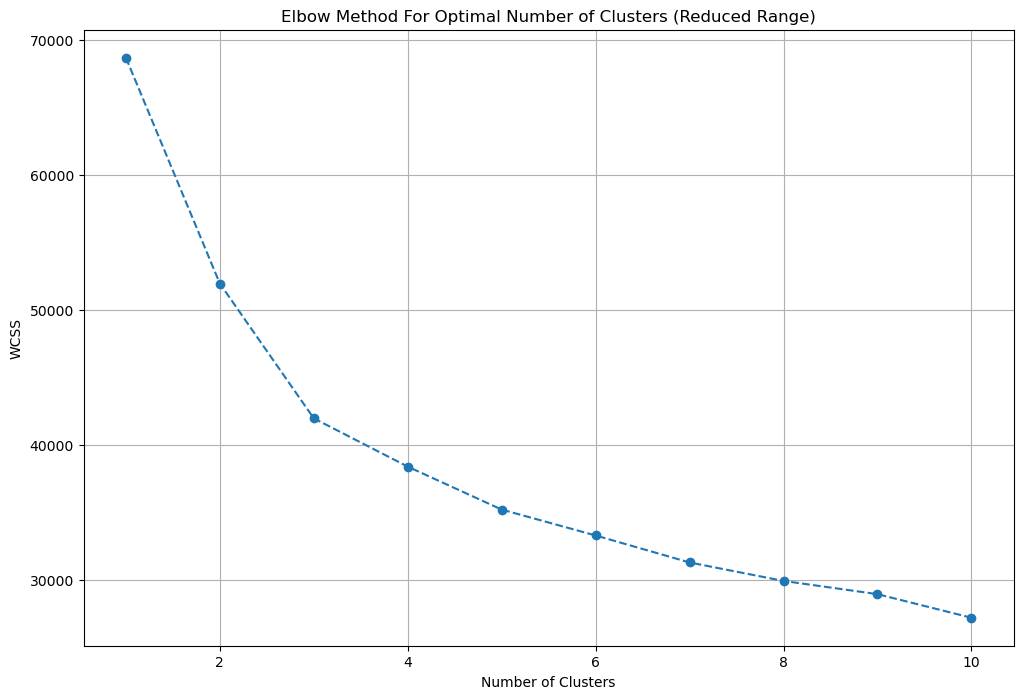

In [42]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [43]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/Users/hrishityelchuri/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
df=df.iloc[:,:-18]

In [45]:
df['furnishing_type'] = cluster_assignments

5.Features

In [46]:
df[['society','features']].sample(5)

,society,features
2338,tulip violet,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
113,godrej icon,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
2493,vatika inxt floors,NaN
979,signature global city 63a,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Park', 'Visitor Parking']"
873,raheja vedaanta,NaN


In [47]:
df['features'].isnull().sum()

636

In [48]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [49]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [50]:
temp_df = df[df['features'].isnull()]

In [51]:
temp_df.shape

(636, 26)

In [52]:
temp_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,flat,dlf the arbour,sector 63,7.90,20000.0,3950.0,Built Up area: 3950 (366.97 sq.m.)Carpet area: 2900 sq.ft. (269.42 sq.m.),4,4,3+,not available,34.0,NaN,Under Construction,"['Radhakrishna Shani Mandir', 'pracksht hospital', 'Vatsalya Clinic', 'SPAZE BUSINESS PARK', 'International Tech Park', 'Intellion Park', 'Hdfc bank', 'Hdfc bank and atm', 'Pizza Hut', 'Madison and Pike']",[],NaN,NaN,3950.0,2900.000000,0,0,0,0,0,1
5,flat,spectrum centre,sector 82a,0.62,9538.0,650.0,Built Up area: 650 (60.39 sq.m.),1,1,0,not available,6.0,NaN,Undefined,"['Orris Community Center', 'Petrol Pump Indian Oil', 'Petrol Pump', 'Petrol Pump Indian Oil', 'Petrol pump Maitri motors', 'Rao Dhaba', ""McDonald's"", 'KFC', 'Pizza Hut', ""McDonald's"", 'Haldiram']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,650.0,NaN,0,0,0,0,0,1
24,flat,unitech heritage city,sector 14,4.26,13108.0,3250.0,Built Up area: 3250 (301.93 sq.m.),4,4,0,not available,9.0,NaN,Undefined,"['Mg road metro station', 'Iffco chowk metro station', 'Sikandarpur metro station', 'Sikanderpur metro station', 'Vodafone belvedere towers metro station', 'Sikandarpur rmrg metro station', 'Dlf phase 2 metro station', 'Arya Samaj Mandir', 'Jain Bhawan', 'Hanuman Mandir', 'Punjab national bank ATM', 'Axis bank ATM', 'Icici bank ATM', 'Privat Hospital', 'Uma Sanjeevani Health Centre And Hospital', 'Lord Krishna Hospital', 'Sidhesh Hospital Gurgaon', 'Surgi Center Clinic', 'Umkal Hospital', 'Thukral Hospital', 'Divine Look Clinic Centre 1', 'Guardian', '98.4', 'Religare Wellness', 'Neelkanth Medico', 'DLF Cyber City Phase II', 'Emaar Business Park', 'PVR Cinames', 'DT Cinemas', 'PVR Metropolitan', 'DT Cinemas', 'PVR Cinames', 'Abn amro bank', 'Indusind bank', 'Lord krishna bank', 'Hdfc bank', 'Kotak mahindra bank', 'Hsbc bank', 'Axis bank', 'Pan Bangkok', 'NutrioBox Gurugram', 'Barbecue Grill', 'Mukesh Dhaba', 'Pizza Hut', 'American Montessori']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,3250.0,NaN,0,0,0,0,0,1
29,flat,signature global solera,sector 107,0.40,6644.0,602.0,Super Built up area 602(55.93 sq.m.)Carpet area: 548 sq.ft. (50.91 sq.m.),2,2,1,not available,7.0,NaN,Relatively New,"['Gurgaon Dreamz Mall', 'Dwarka Expressway', ""Colonel's Central Academy"", 'The NorthCap University', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Trident Hotel Gurgaon', 'Fun N Food Village', 'DLF Golf and Country Club', 'F9 Go Karting Gurgaon', 'SkyJumper Trampoline Park Gurgaon']","['3 Fan', '1 Exhaust Fan', '5 Light', '1 Modular Kitchen', '3 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,602.00,NaN,548.000000,0,0,0,0,0,0
40,house,independent,sector 103,2.25,6367.0,3534.0,Built Up area: 3534 (328.32 sq.m.)Carpet area: 2000 sq.ft. (185.81 sq.m.),3,5,3+,not available,10.0,South,Undefined,NaN,NaN,NaN,NaN,3534.0,2000.000000,0,0,0,0,0,1
41,house,independent,sector 7,0.53,5888.0,900.0,Built Up area: 900 (83.61 sq.m.),2,2,0,not available,1.0,NaN,Undefined,NaN,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fri

In [53]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [54]:
df.loc[temp_df.index,'features'] = x.values

In [55]:
df['features'].isnull().sum()

482

In [56]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [57]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [58]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
3275,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1860,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2009,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2673,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
745,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [59]:
features_binary_df.shape

(3816, 130)

In [60]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

/Users/hrishityelchuri/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hrishityelchuri/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hrishityelchuri/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hrishityelchuri/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The defa

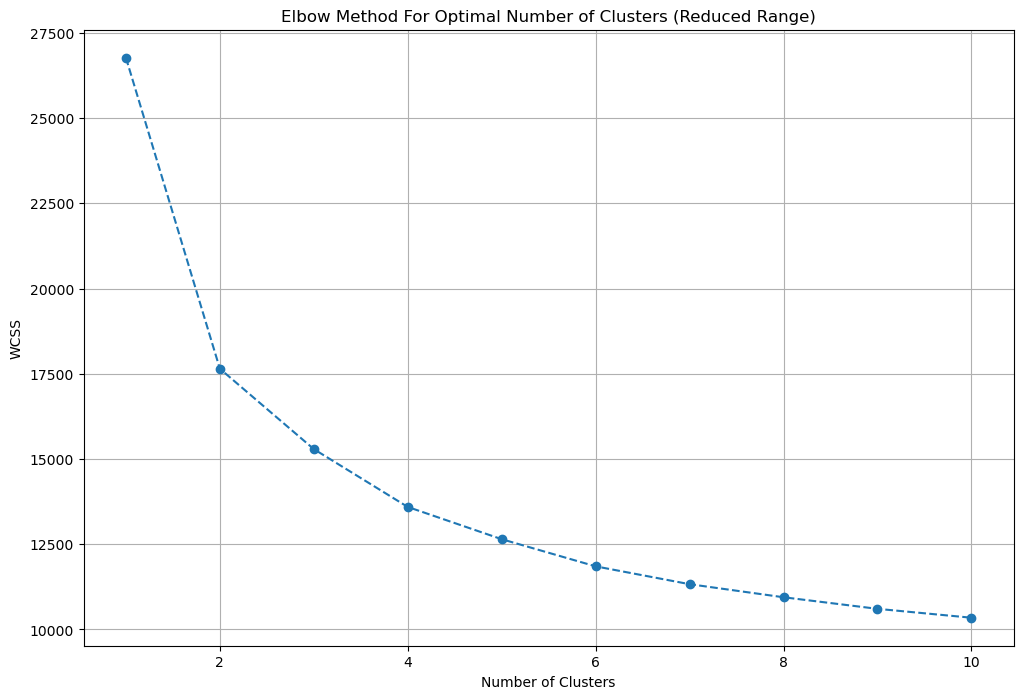

In [61]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [62]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [63]:
df['luxury_score'] = luxury_score

In [64]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,dlf the arbour,sector 63,7.90,20000.0,3950.0,Built Up area: 3950 (366.97 sq.m.)Carpet area: 2900 sq.ft. (269.42 sq.m.),4,4,3+,not available,34.0,NaN,Under Construction,"['Radhakrishna Shani Mandir', 'pracksht hospital', 'Vatsalya Clinic', 'SPAZE BUSINESS PARK', 'International Tech Park', 'Intellion Park', 'Hdfc bank', 'Hdfc bank and atm', 'Pizza Hut', 'Madison and Pike']",[],"['Swimming Pool', 'Community Hall', 'Yoga/Meditation Area', '24x7 Security', 'Club House', 'Gated Community', 'Gymnasium', 'Landscape Garden', ""Children's Play Area""]",NaN,3950.0,2900.0,0,0,0,0,0,1,"[Swimming Pool, Community Hall, Yoga/Meditation Area, 24x7 Security, Club House, Gated Community, Gymnasium, Landscape Garden, Children's Play Area]",61
1,flat,birla navya,sector 63a,3.70,15416.0,2400.0,Carpet area: 2400 (222.97 sq.m.),3,3,3+,not available,1.0,North,Under Construction,"['Sector 54 Chowk Metro Station', 'WorldMark Gurgaon', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'Gurgaon - Delhi Expy', 'Heritage Xperiential Learning, CRPF Rd', 'Sushant University', 'W Pratiksha Hospital', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station', 'Capital Cyberscape', 'DoubleTree by Hilton Hotel']",[],"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,2400.0,0,0,0,0,0,1,"[Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Visitor Parking, Swimming Pool, Park, Fitness Centre / GYM, Rain Water Harvesting, Club house / Community Center]",72
2,flat,deepak minda,manesar,1.20,4528.0,2650.0,Carpet area: 2650 (246.19 sq.m.),3,3,3+,servant room,6.0,North-West,Moderately Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash Hospital', 'Shri Rade Clinic', 'Yadav Dental & Eye Care', 'Dental Hospital', 'Petrol pump Maitri motors', 'Petrol Pump', ""McDonald's"", ""McDonald's"", 'Rao Dhaba']","['7 Fan', '7 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Piped-gas', 'Rain Water Harvesting']",NaN,NaN,2650.0,0,1,0,0,0,1,"[Piped-gas, Rain Water Harvesting]",7
3,house,unitech uniworld resorts,sector 33,11.50,24573.0,4680.0,Plot area 520(434.79 sq.m.),5,6,3+,servant room,4.0,East,Relatively New,"['Rajiv Chowk Mosque', 'Icici bank ATM', 'Standard chartered ATM', 'Samvit Health Care', 'Airforce Hospital', 'Medanta', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Sukhmani Hospital Pvt. Ltd', 'Vaishnavi Nursing Home', 'Best Urologist Atcomplete Family Clinic', 'Ayushman Hospital And Trauma Centre', 'Park Hospital Gurgaon', 'Wellness Eye Centre', 'Neelkanth Health Care', 'Dr. Aruna Kalra', 'Vishesh Dental', 'Smile Plus Dental Clinic', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Bansal Medicare and Maternity Centre', 'Pushpanjali Hospital Gurgaon', 'Shri Ram Dental Clinic', 'Sunrise Hospital Gurgaon', 'Meher Clinic', 'Rajendra Hospital', 'Pushpanjali Hospital', 'Sai Dental Clinic', 'Nutan Dental Hospital', 'Parmar Dental Clinic & Lab', 'Road and Traffic Authority', 'Gurgaon Election Commission', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'KFC', 'Haldiram', ""Domino's Pizza"", ""Nirula's"", 'Kendriya Vidyalaya No.2 Sohna Road', 'Delhi Public School Primary Section']","['5 

In [65]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [66]:
df.shape

(3816, 23)

In [67]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)